<a href="https://colab.research.google.com/github/wafa-b/Introduction-to-Deep-Learning-with-PyTorch/blob/master/Chinese_zodiac_challenges_(_LunarNewYear).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wafaab","key":"c3b1752b44ed6f5e678f83cad98a13b2"}'}

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d elderyouth/chinese-zodiac-signs

100% 2.07G/2.07G [00:28<00:00, 5.64MB/s]
100% 2.07G/2.07G [00:28<00:00, 78.3MB/s]


In [6]:
!unzip chinese-zodiac-signs.zip

Archive:  chinese-zodiac-signs.zip
  inflating: signs/test/dog/00000004.jpg  
  inflating: signs/test/dog/00000005.jpg  
  inflating: signs/test/dog/00000010.jpg  
  inflating: signs/test/dog/00000011.jpg  
  inflating: signs/test/dog/00000038.jpg  
  inflating: signs/test/dog/00000039.jpg  
  inflating: signs/test/dog/00000144.jpeg  
  inflating: signs/test/dog/00000164.jpg  
  inflating: signs/test/dog/00000165.jpg  
  inflating: signs/test/dog/00000167.jpg  
  inflating: signs/test/dog/00000170.jpg  
  inflating: signs/test/dog/00000173.jpg  
  inflating: signs/test/dog/00000206.jpg  
  inflating: signs/test/dog/00000207.jpg  
  inflating: signs/test/dog/00000212.jpg  
  inflating: signs/test/dog/00000213.jpg  
  inflating: signs/test/dog/00000359.jpg  
  inflating: signs/test/dog/00000365.jpg  
  inflating: signs/test/dog/00000366.jpg  
  inflating: signs/test/dog/00000371.jpg  
  inflating: signs/test/dog/00000372.jpg  
  inflating: signs/test/dog/00000373.jpg  
  inflating: signs

In [7]:
!pip install nonechucks

  Created wheel for nonechucks: filename=nonechucks-0.4.0-cp36-none-any.whl size=11546 sha256=d9694828a9ca9b6f210beb570048ab40013e82c13e8890156d6cddaeec67b382
  Stored in directory: /root/.cache/pip/wheels/00/b3/4e/4e30d5f934293de9abab2bfe6a4ce6fe77bf936c625133dd9c
Successfully built nonechucks


In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
import numpy as np
import nonechucks as nc
from torch import nn
from torch import optim
import torch.nn.functional as F
from collections import OrderedDict

from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler

nonechucks may not work properly with this version of PyTorch (1.3.1). It has only been tested on PyTorch versions 1.0, 1.1, and 1.2


In [0]:
data_dir = 'signs'

batch_size = 16
# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
valid_data = datasets.ImageFolder(data_dir + '/valid', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

train_data = nc.SafeDataset(train_data)
test_data = nc.SafeDataset(test_data)
valid_data = nc.SafeDataset(valid_data)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
validloader=torch.utils.data.DataLoader(valid_data,batch_size=batch_size,shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,shuffle=True)

Chinese_zodiac_names= ['dog', 'dragon', 'goat', 'horse', 'monkey', 'ox', 'pig', 'rabbit', 
           'ratt', 'rooster', 'snake', 'tiger']

In [10]:
model=models.densenet121(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 61.7MB/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

16


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


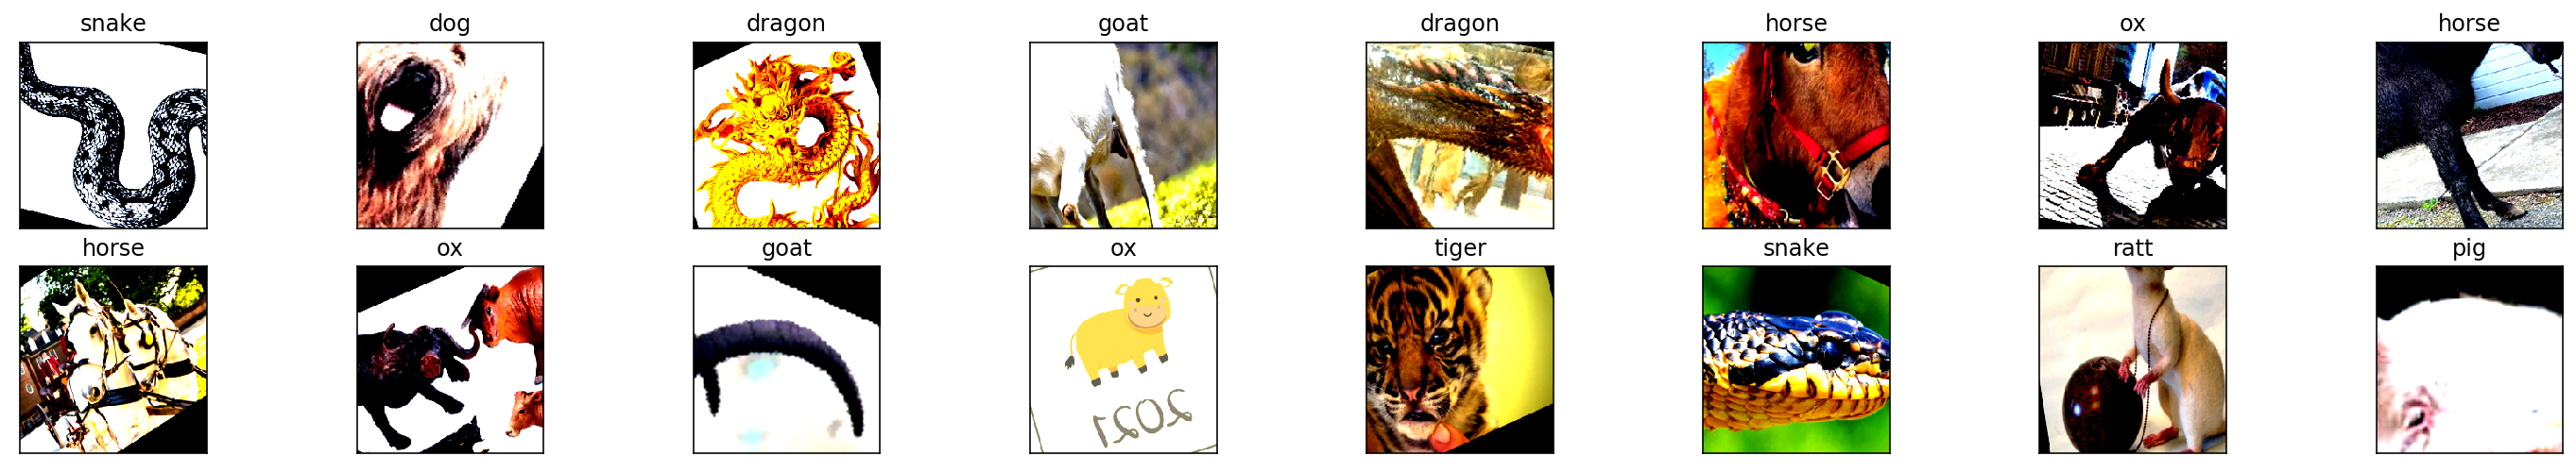

In [11]:
# helper function to un-normalize and display an image
def imshow(img):
    # unnormalize
    img = img / 2 + 0.5  
    # convert from Tensor image
    plt.imshow(np.transpose(img, (1, 2, 0)))  

# obtain one batch of training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
# convert images to numpy for display
images = images.numpy() 
print(len(images))

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 16 images
for idx in np.arange(16):
    ax = fig.add_subplot(2, 16/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(Chinese_zodiac_names[labels[idx]])

In [12]:
# Use GPU if it's available
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=models.densenet121(pretrained=True)
# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad=False    
# model.classifier=nn.Sequential(nn.Linear(1024, 256),
#                                  nn.ReLU(),
#                                  nn.Dropout(0.2),
#                                  nn.Linear(256, 12),
#                                  nn.LogSoftmax(dim=1))
model.classifier=nn.Sequential(OrderedDict([
                                ('fc1',nn.Linear(1024, 256)),
                                ('relu',nn.ReLU()),
                                ('dropout',nn.Dropout(0.25)),
                                ('fc2',nn.Linear(256, 64)),
                                ('reul',nn.ReLU()),
                                ('dropout',nn.Dropout(0.25)),
                                ('fc3',nn.Linear(64, 12)),
                                ('output',nn.LogSoftmax(dim=1))
                                ]))
print(model)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [0]:
# specify loss function (categorical cross-entropy)
criterion=nn.NLLLoss()
# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr = 0.0001)
model.to(device);

In [14]:
#Define number of epochs to train the model
num_epochs=40
#Initialize tracker for minimum validation loss
#Set initial "min" to infinity
valid_loss_min=np.Inf 
for epoch in range(num_epochs):
    #Monitor training loss
    train_loss=0.0 
    valid_loss=0.0
    #Define model for training
    model.train()
    #Train the model
    for data,target in trainloader:
        #move tensors to GPU if CUDA is available
        if device:
            data, target = data.cuda(), target.cuda()
        #1.Clear the gradients of all optimized variables
        optimizer.zero_grad()
        #2.Forward pass:compute predicted outputs by passing inputs to the model
        output=model(data)
        #3.Calculate the loss
        loss=criterion(output,target)
        #4.Backward pass:compute gradient of the loss with respect to model parameters
        loss.backward()
        #5.Perform a single optimization step (parameter update)
        optimizer.step()
        #6.Update running training loss
        train_loss+=loss.item()*data.size(0) 
    #Validate the model 
    #Define model for evaluation
    model.eval() 
    for data,target in validloader:
        #move tensors to GPU if CUDA is available
        if device:
            data, target = data.cuda(), target.cuda()
        #1.forward pass: compute predicted outputs by passing inputs to the model
        output=model(data)
        #2.calculate the loss
        loss=criterion(output,target)
        #3.update running validation loss 
        valid_loss+=loss.item()*data.size(0)
        
    #To Print training & validation statistics 
    #Calculate average loss over an epoch
    train_loss=train_loss/len(trainloader.sampler)
    #Calculate average loss over an epoch
    valid_loss=train_loss/len(validloader.sampler)
    print('Epoch: {} \tTraining Loss: {:.6f}\tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))
    #Save model if validation loss has decreased
    if valid_loss<=valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(),'chinese-zodiac-signs.pt')
        valid_loss_min=valid_loss

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch: 1 	Training Loss: 1.787260	Validation Loss: 0.002750
Validation loss decreased (inf --> 0.002750).  Saving model ...
Epoch: 2 	Training Loss: 0.943754	Validation Loss: 0.001452
Validation loss decreased (0.002750 --> 0.001452).  Saving model ...
Epoch: 3 	Training Loss: 0.752813	Validation Loss: 0.001158
Validation loss decreased (0.001452 --> 0.001158).  Saving model ...
Epoch: 4 	Training Loss: 0.683756	Validation Loss: 0.001052
Validation loss decreased (0.001158 --> 0.001052).  Saving model ...
Epoch: 5 	Training Loss: 0.627262	Validation Loss: 0.000965
Validation loss decreased (0.001052 --> 0.000965).  Saving model ...
Epoch: 6 	Training Loss: 0.594518	Validation Loss: 0.000915
Validation loss decreased (0.000965 --> 0.000915).  Saving model ...
Epoch: 7 	Training Loss: 0.572449	Validation Loss: 0.000881
Validation loss decreased (0.000915 --> 0.000881).  Saving model ...
Epoch: 8 	Training Loss: 0.557197	Validation Loss: 0.000857
Validation loss decreased (0.000881 --> 0.

In [15]:
model.load_state_dict(torch.load('chinese-zodiac-signs.pt'))

<All keys matched successfully>

In [16]:
#Define lists to monitor test loss and accuracy
test_loss=0.0
class_correct=list(0. for i in range(12))
class_total=list(0. for i in range(12))
#Define model for evaluation
model.eval()
for data,target in testloader:
    #move tensors to GPU if CUDA is available
    if device:
        data,target=data.cuda(),target.cuda()
    #1.Forward pass:testloadercompute predicted outputs by passing inputs to the model
    output=model(data)
    #2.Calculate the loss
    loss=criterion(output,target)
    #3.Update test loss 
    test_loss+=loss.item()*data.size(0)
    #4.Convert output probabilities to predicted class
    _, pred=torch.max(output,1)
    #5.Compare predictions to true label
    correct=np.squeeze(pred.eq(target.data.view_as(pred)))
    #6.Calculate test accuracy for each object class
    for i in range(len(target)):
        label=target.data[i]
        class_correct[label]+=correct[i].item()
        class_total[label]+=1
# calculate and print avg test loss
test_loss=test_loss/len(testloader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))
for i in range(12):
    if class_total[i]>0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)'%(
            Chinese_zodiac_names[i],100*class_correct[i]/class_total[i],
            np.sum(class_correct[i]),np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)'%(classes[i]))
        
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)'%(
    100.*np.sum(class_correct)/np.sum(class_total),
    np.sum(class_correct),np.sum(class_total)))

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Test Loss: 0.247483

Test Accuracy of   dog: 94% (52/55)
Test Accuracy of dragon: 87% (48/55)
Test Accuracy of  goat: 90% (50/55)
Test Accuracy of horse: 98% (54/55)
Test Accuracy of monkey: 94% (52/55)
Test Accuracy of    ox: 92% (51/55)
Test Accuracy of   pig: 98% (54/55)
Test Accuracy of rabbit: 96% (53/55)
Test Accuracy of  ratt: 87% (48/55)
Test Accuracy of rooster: 92% (51/55)
Test Accuracy of snake: 94% (52/55)
Test Accuracy of tiger: 90% (50/55)

Test Accuracy (Overall): 93% (615/660)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

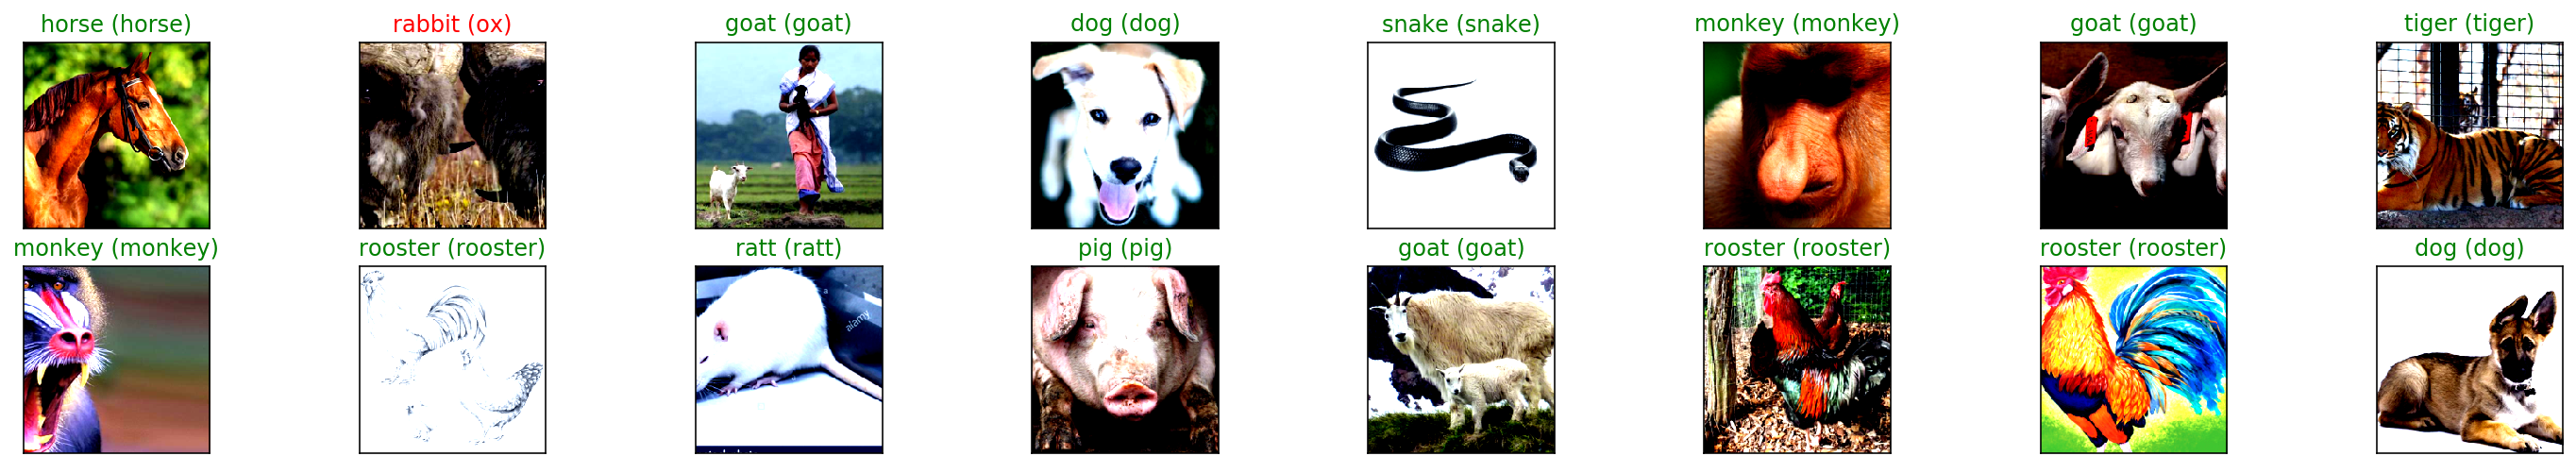

In [17]:
#To see one batch of test images
dataiter=iter(testloader)
images,labels=dataiter.next()
images.numpy()
#move model inputs to cuda, if GPU available
if device:
    images=images.cuda()
#get sample outputs
output=model(images)
# convert output probabilities to predicted class
_, preds_tensor=torch.max(output,1)
preds=np.squeeze(preds_tensor.numpy()) if not device else np.squeeze(preds_tensor.cpu().numpy())

#plot the images in the batch, along with predicted and true labels
fig=plt.figure(figsize=(25,4))
for idx in np.arange(16):
    ax=fig.add_subplot(2,16/2,idx+1,xticks=[],yticks=[])
    imshow(images.cpu()[idx])
    ax.set_title("{} ({})".format(Chinese_zodiac_names[preds[idx]],Chinese_zodiac_names[labels[idx].item()]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))